<a href="https://colab.research.google.com/github/Idostri/CNN/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as f
from torchvision import datasets, transforms

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Resize((32, 32)),
                                transforms.Normalize((0.5, ), (0.5, ))])

train_set = datasets.CIFAR10(root='./', train=True, transform=transform, download=True)
test_set = datasets.CIFAR10(root='./', train=False, transform=transform, download=True)


train_load = torch.utils.data.DataLoader(dataset=train_set, batch_size= 100, shuffle=True)
test_load = torch.utils.data.DataLoader(dataset= test_set, batch_size=100, shuffle= False)

dataiter = iter(train_load)
inputs, labels = dataiter.next()
dataiter2 = iter(test_load)
val_inputs, val_labels = dataiter2.next()


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
    self.fulc1 = nn.Linear(4*4*64, 500)
    self.dropout = nn.Dropout(0.5)
    self.fulc2 = nn.Linear(500, 10)
  def forward(self, x):
    x = f.relu(self.conv1(x))
    x = f.max_pool2d(x, 2, 2)
    x = f.relu(self.conv2(x))
    x = f.max_pool2d(x, 2, 2)
    x = f.relu(self.conv3(x))
    x = f.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*64)
    x = f.relu(self.fulc1(x))
    x = self.dropout(x)
    x = self.fulc2(x)
    return x





In [ ]:
model = Classifier().to(device)


In [ ]:
cretartion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
  epochs = 15
  loss_history = []
  validation_loss_history = []
  for i in range(epochs):
    running_loss = 0.0
    val_running_loss =0.0
    for inputs, labels in train_load:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss = cretartion(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    else:
      with torch.no_grad():
        for val_inputs, val_labels in test_load:
          val_inputs = val_inputs.to(device)
          val_labels = val_labels.to(device)
          val_outputs = model(val_inputs)
          val_loss = cretartion(val_outputs, val_labels)

          val_running_loss += val_loss.item()

    
      epoch_loss = running_loss/len(train_load)
      val_epoch_loss = val_running_loss/len(test_load)
      loss_history.append(epoch_loss)
      validation_loss_history.append(val_epoch_loss)
      print('current loss: {:4f}' ,format(epoch_loss))
      print( 'val current loss: {:4f}' ,format(val_epoch_loss))
  








current loss: {:4f} 1.5916852440834046
val current loss: {:4f} 1.336973532438278
current loss: {:4f} 1.2111921195983886
val current loss: {:4f} 1.1504564881324768
current loss: {:4f} 1.0603504787683486
val current loss: {:4f} 1.0281003838777543
current loss: {:4f} 0.9452763097286224
val current loss: {:4f} 0.9830355817079544
current loss: {:4f} 0.8641291031837464
val current loss: {:4f} 0.9344024431705474
current loss: {:4f} 0.8003032547235489
val current loss: {:4f} 0.8986787593364716
current loss: {:4f} 0.7499447168111801
val current loss: {:4f} 0.899457597732544
current loss: {:4f} 0.6970232998132706
val current loss: {:4f} 0.89157819211483
current loss: {:4f} 0.6542398146986962
val current loss: {:4f} 0.8726303055882454
current loss: {:4f} 0.6147097702026367
val current loss: {:4f} 0.8490435975790024
current loss: {:4f} 0.5770348455905915
val current loss: {:4f} 0.8903592580556869
current loss: {:4f} 0.5424189858436584
val current loss: {:4f} 0.862727684378624
current loss: {:4f} 0

No handles with labels found to put in legend.


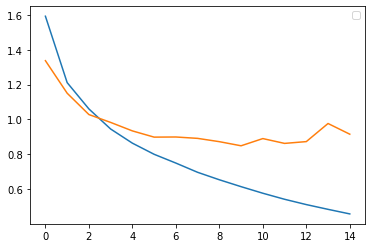

In [ ]:

plt.plot(loss_history)
plt.plot(validation_loss_history)
plt.legend()

In [ ]:
import requests
from PIL import Image
url = 'https://static.scientificamerican.com/sciam/cache/file/41DF7DA0-EE58-4259-AA815A390FB37C55_source.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
image = transform(img)

In [ ]:

images = image.to(device).unsqueeze(0)
output = model(images)
_, pred = torch.max(output, 1)
print(classes[pred.item()])


frog


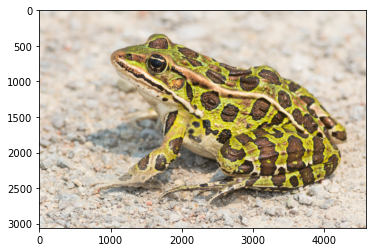

In [ ]:
plt.imshow(img)